#**AI for Road Safety**

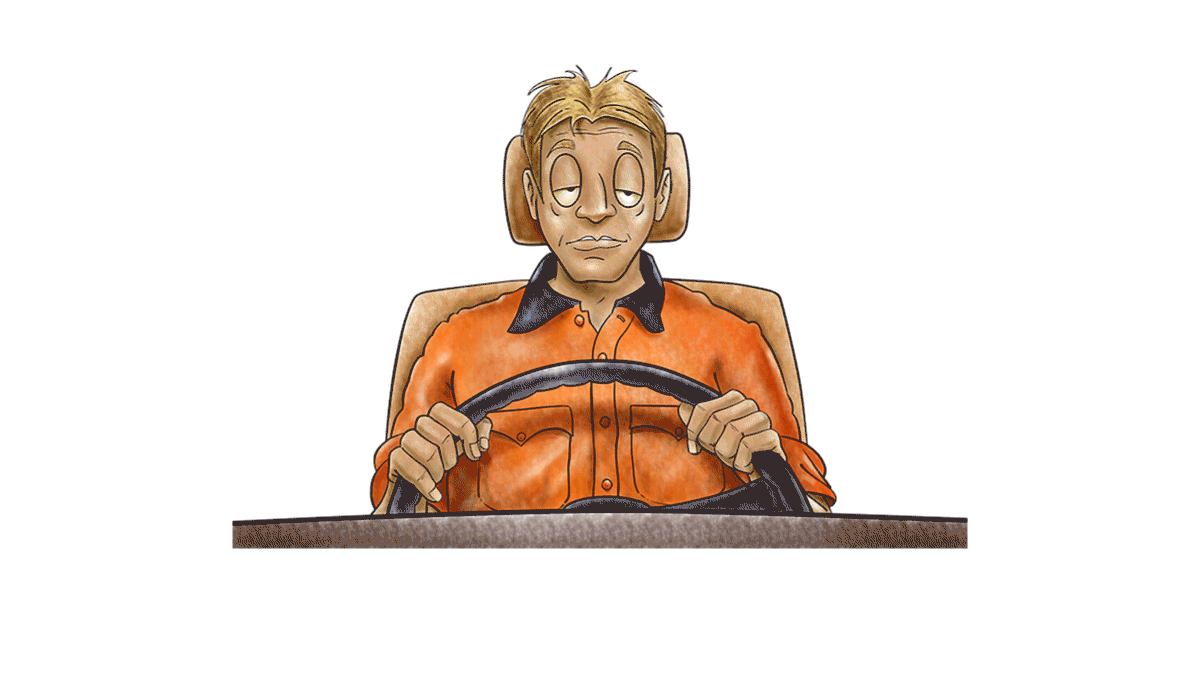

##**1. Install and Import Dependencies**

In [ ]:
# Menginstal dependensi yang diperlukan
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16620, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 16620 (delta 55), reused 63 (delta 29), pack-reused 16522
Receiving objects: 100% (16620/16620), 15.16 MiB | 14.09 MiB/s, done.
Resolving deltas: 100% (11412/11412), done.


In [ ]:
import torch  # Mengimpor PyTorch untuk memuat dan menjalankan model YOLOv5
from matplotlib import pyplot as plt  # Mengimpor Matplotlib untuk menampilkan gambar hasil deteksi
import numpy as np  # Mengimpor NumPy untuk operasi numerik
import cv2  # Mengimpor OpenCV untuk pemrosesan gambar

##**2. Load Model**

In [ ]:
# Memuat model YOLOv5 yang telah dilatih sebelumnya
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or 'yolov5m', 'yolov5l', 'yolov5x'

/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 129.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 218.1 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 7.0s, installed 2 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-5-21 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 92.1MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
# memanggil model yolov5
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

**5. Dataset**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**6. Train**

In [ ]:
# Memulai pelatihan model YOLOv5 dengan skrip train.py

# --img 320: Menentukan ukuran gambar input yang akan digunakan selama pelatihan (320x320 piksel)
# --batch 32: Menentukan ukuran batch yang akan digunakan selama pelatihan (32 gambar per batch)
# --epochs 50: Menentukan jumlah epoch atau iterasi yang akan dilakukan selama pelatihan (50 epoch)
# --data /content/yolov5/dataset.yml: Menentukan path ke file konfigurasi dataset (dataset.yml) yang berisi informasi tentang dataset yang digunakan
# --weights yolov5s.pt: Menentukan path ke file bobot awal (pre-trained weights) yang akan digunakan untuk memulai pelatihan (yolov5s.pt)
# --workers 2: Menentukan jumlah pekerja (workers) untuk pemrosesan data (2 pekerja)

!python train.py --img 320 --batch 32 --epochs 50 --data /content/yolov5/dataset.yml --weights yolov5s.pt --workers 2

2024-05-21 19:35:51.359271: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 19:35:51.359336: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 19:35:51.361505: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, singl

In [ ]:
# Mengubah direktori kerja saat ini ke direktori yolov5, di mana skrip val.py berada

# Menjalankan skrip val.py untuk mengevaluasi model YOLOv5

# --weights /content/yolov5/runs/train/exp2/weights/best.pt: Menentukan path ke file bobot model yang akan dievaluasi (best.pt)
# --img 320: Menentukan ukuran gambar input yang akan digunakan selama evaluasi (320x320 piksel)
# --data /content/yolov5/dataset.yml: Menentukan path ke file konfigurasi dataset (dataset.yml) yang digunakan untuk evaluasi

!cd yolov5 && python val.py --weights /content/yolov5/runs/train/exp2/weights/best.pt /content/yolov5/runs/train/exp2/weights/best.pt --img 320  --data /content/yolov5/dataset.yml

val: data=/content/yolov5/dataset.yml, weights=['/content/yolov5/runs/train/exp2/weights/best.pt', '/content/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-313-g712de55a Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Ensemble created with ['/content/yolov5/runs/train/exp2/weights/best.pt', '/content/yolov5/runs/train/exp2/weights/best.pt']

val: Scanning /content/drive/MyDrive/Dataset_Project_Massive/labels.cache... 2938 images, 0 backgrounds, 0 corrupt: 100% 2938/2938 [00:00<?, ?it/s]
                 Cla

In [ ]:
!cd yolov5 && python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt /content/yolov5/runs/train/exp2/weights/best.pt --img 320 --source /content/drive/MyDrive/Dataset_Project_Massive/images

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt', '/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/Dataset_Project_Massive/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-313-g712de55a Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Ensemble created with ['/content/yolov5/runs/train/exp2/weights/best.pt', '/content/yolov5/runs/train/exp2/weights/best.pt']

WARNING ⚠️ 